In [1]:
import numpy as np
import pandas as pd

In [ ]:
df_clean2 = pd.read_csv('df_clean2.csv')
df_clean2.keys()

Index(['Unnamed: 0', 'Unnamed: 0.1', 'DateId', 'MemberId', 'OrderGroupCode',
       'TrackSourceTypeDef', 'TrackDeviceTypeDef', 'PayProfileTypeDef',
       'SalesOrderSlaveId', 'SalePageId', 'IsMajor', 'IsGift',
       'IsSalePageGift', 'Quantity', 'UnitPrice', 'PromotionDiscount',
       'ECouponId', 'ECouponDiscount', 'SalesOrderSlaveTotalPayment',
       'SalesOrderSlaveDateTime', 'SalesOrderReceiverId', 'City', 'District',
       'ZipCode', 'StoreName', 'StoreId', 'DeliverTypeDef', 'StatusDef',
       'ReturnGoodsDateId', 'CauseDef', 'new_DateId'],
      dtype='object')

 - 將地區分為北、中、東、南區

In [29]:
dict_region = {"北部":['臺北','台北','新北','基隆','宜蘭','桃園','新竹'],
               "中部":['苗栗','臺中','台中','彰化','南投','雲林'],
               "南部":['嘉義','臺南','台南','高雄','屏東','澎湖'],
               "東部":['花蓮','台東','臺東']
              }

In [30]:
m_state = df_clean2[df_clean2['City'] == df_clean2['City']]  #過濾nan
m_state.head()

,Unnamed: 0,Unnamed: 0.1,DateId,MemberId,OrderGroupCode,TrackSourceTypeDef,TrackDeviceTypeDef,PayProfileTypeDef,SalesOrderSlaveId,SalePageId,...,City,District,ZipCode,StoreName,StoreId,DeliverTypeDef,StatusDef,ReturnGoodsDateId,CauseDef,new_DateId
0,0,0,20150703,1388133,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,Web,Mobile,SevenEleven,4457777,1242871,...,嘉義縣,水上鄉,608.0,中庄門市,910828.0,SevenEleven,Finish,NaN,NaN,2015-07-03 00:00:00
1,1,1,20150703,1388133,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,Web,Mobile,SevenEleven,4457778,1242880,...,嘉義縣,水上鄉,608.0,中庄門市,910828.0,SevenEleven,Finish,NaN,NaN,2015-07-03 00:00:00
2,2,2,20150703,1388133,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,Web,Mobile,SevenEleven,4457779,1242880,...,嘉義縣,水上鄉,608.0,中庄門市,910828.0,SevenEleven,Finish,NaN,NaN,2015-07-03 00:00:00
3,3,3,20150703,1388133,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,Web,Mobile,SevenEleven,4457780,1175574,...,嘉義縣,水上鄉,608.0,中庄門市,910828.0,SevenEleven,Finish,NaN,NaN,2015-07-03 00:00:00
4,4,4,20150703,365787,"b""\x04?}pe$m\x7f\x85\xa0y\x81'e5\xca\xbb\xf9\x...",Web,Mobile,SevenEleven,4457791,1194488,...,桃園市,中壢區,320.0,復華門市,114071.0,SevenEleven,Finish,NaN,NaN,2015-07-03 00:00:00


In [31]:
def get_keys(d, seri_state):
    
    result = list()
    for state in seri_state:
        locate_flag = 0
        for key,value in d.items():
            for a in value:            
                if a in state:
                    result.append(key)
                    locate_flag = 1
                    break
            if locate_flag == 1:
                break
        if locate_flag == 0:
            result.append('not_define')
    return result
    
get_keys(dict_region, ['桃園'])

['北部']

In [32]:
m_state['Area'] = get_keys(dict_region, m_state['City'])

In [33]:
m_state =  m_state[m_state['Area'] != 'not_define'] # 

In [34]:
# 取出 "地區、城市、購買數量、物品編號、時間"
a0 = pd.Series(m_state['new_DateId'])
a1 = pd.Series(m_state['SalePageId'])
a2 = pd.Series(m_state['Quantity'])
a3 = pd.Series(m_state['City'])
a4 = pd.Series(m_state['Area'])

data = {'new_DateId':a0,'SalePageId':a1,'Quantity':a2,'City':a3,'Area':a4}
item_loc = pd.DataFrame(data)
item_loc.head()

,Area,City,Quantity,SalePageId,new_DateId
0,南部,嘉義縣,1,1242871,2015-07-03 00:00:00
1,南部,嘉義縣,1,1242880,2015-07-03 00:00:00
2,南部,嘉義縣,1,1242880,2015-07-03 00:00:00
3,南部,嘉義縣,1,1175574,2015-07-03 00:00:00
4,北部,桃園市,1,1194488,2015-07-03 00:00:00


In [35]:
city_num = item_loc.groupby(by='City')['Quantity'].sum()
city_num

City
南投縣      74939
台中市     815918
台北市     705464
台南市     407470
台東縣      35217
嘉義市      55276
嘉義縣      68262
基隆市      89367
宜蘭縣      87111
屏東縣     125897
彰化縣     201898
新北市    1196609
新竹市     148414
新竹縣     129924
桃園市     599553
澎湖縣      20190
花蓮縣      69475
苗栗縣     108647
雲林縣      88407
高雄市     580556
Name: Quantity, dtype: int64

In [12]:
name = []
s0 = []
s1 = []
for i in range(len(city_num)):
    item_sum = ((item_loc[item_loc['City'].str.contains((city_num.keys())[i])==True]).groupby(by='SalePageId')['Quantity'].sum()).sort_values(ascending = False).head()
    for j in range(0,5):
        name.append((city_num.keys())[i])
    s0.append(pd.Series(item_sum.keys()))
    s1.append(pd.Series(np.array(item_sum)))
b2 = pd.Series(name)
b1 = pd.Series(s1)
b0 = pd.Series(s0)

In [13]:
t0 = []
t1 = []
for i in range((len(b0))):
    t0 = np.hstack((t0,np.array(b0[i])))
    t1 = np.hstack((t1,np.array(b1[i])))
s0 = pd.Series(t0)
s1 = pd.Series(t1)

In [14]:
# 找出每個縣市最喜歡購買前五名的物品
dataa = {'City':b2,'ItemId':s0,'Quantity':s1}
item_num_loc = pd.DataFrame(dataa)

In [19]:
item_num_loc.iloc[0:10]

,City,ItemId,Quantity
0,南投縣,1830694.0,393.0
1,南投縣,2336461.0,384.0
2,南投縣,2294453.0,317.0
3,南投縣,3830498.0,275.0
4,南投縣,1119387.0,271.0
5,台中市,2336461.0,4218.0
6,台中市,2294453.0,4018.0
7,台中市,1830694.0,3737.0
8,台中市,1119387.0,3399.0
9,台中市,3830498.0,3063.0


 - #### 因為有些城市購買的物品相似，所以還是很難看出城市之間不同喜好 ； 因此下一步想做每個城市每個月物品購買隨時間的變化

In [20]:
name = []
item_year = []
item_month =[]
s0 = []
s1 = []
year = ['5','6','7','8']
month = ['01','02','03','04','05','06','07','08','09','10','11','12']
for i in range(len(city_num)):
    rr = (item_loc[item_loc['City'].str.contains((city_num.keys())[i])==True]).sort_values(['new_DateId'],ascending = True)
    for q in range(len(year)):
        y = year[q]
        for r in range(len(month)):
            m =  month[r]
            item_sum = (rr[(rr['new_DateId']>'201'+y+'-'+m+'-01') & (rr['new_DateId']<('201'+y+'-'+m+'-31'))].groupby(by='SalePageId')['Quantity'].sum()).sort_values(ascending = False).head()
            for j in range(0,5):
                name.append((city_num.keys())[i])
                item_year.append(('201'+y))
                item_month.append(m)
            s0.append(pd.Series(item_sum.keys()))
            s1.append(pd.Series(np.array(item_sum)))
b4 = pd.Series(item_year)
b3 = pd.Series(item_month)
b2 = pd.Series(name)
b1 = pd.Series(s1)
b0 = pd.Series(s0)

In [21]:
len(b0),len(b1),len(b2),len(b3),len(b4)

(960, 960, 4800, 4800, 4800)

In [22]:
empty_list = []
value_list = []
value_list1 = []
b2_after = []
b3_after = []
b4_after = []
for i in range(len(b0)):
    gg = np.array(b0[i])
    if len(gg) < 4:        
        empty_list.append(i)
    if len(gg) > 4:
        value_list.append(b0[i])
        value_list1.append(b1[i])
        for j in range(0,5):
            b2_after.append(b2[(i*5+j)])
            b3_after.append(b3[(i*5+j)])
            b4_after.append(b4[(i*5+j)])

In [23]:
t0 = []
t1 = []
for i in range((len(value_list))):
    t0 = np.hstack((t0,np.array(value_list[i])))
    t1 = np.hstack((t1,np.array(value_list1[i])))
s0 = pd.Series(t0)
s1 = pd.Series(t1)
s2 = pd.Series(b2_after)
s3 = pd.Series(b3_after)
s4 = pd.Series(b4_after)

In [24]:
dataaa = {'ItemId':s0,'Quantity':s1,'City':s2,'month':s3,'year':s4}
item_num_loc_ = pd.DataFrame(dataaa)

In [25]:
item_num_loc_.head()

,City,ItemId,Quantity,month,year
0,南投縣,1162433.0,6.0,05,2015
1,南投縣,1162454.0,5.0,05,2015
2,南投縣,1175642.0,3.0,05,2015
3,南投縣,1162471.0,3.0,05,2015
4,南投縣,1119583.0,3.0,05,2015


In [26]:
i = 0
kk = item_num_loc_[item_num_loc_['City'].str.contains((city_num.keys())[i])==True]
kk

,City,ItemId,Quantity,month,year
0,南投縣,1162433.0,6.0,05,2015
1,南投縣,1162454.0,5.0,05,2015
2,南投縣,1175642.0,3.0,05,2015
3,南投縣,1162471.0,3.0,05,2015
4,南投縣,1119583.0,3.0,05,2015
5,南投縣,1194488.0,20.0,06,2015
6,南投縣,1175574.0,14.0,06,2015
7,南投縣,1119555.0,14.0,06,2015
8,南投縣,1194536.0,13.0,06,2015
9,南投縣,1194545.0,12.0,06,2015


In [27]:
ItemId_top = []
for i in range(int(len(kk)/5)):
    ItemId_top.append((kk.iloc[[(i*5)]])['ItemId'][(i*5)])

In [28]:
ItemId_top[0:100]

[1162433.0,
 1194488.0,
 1270622.0,
 1348360.0,
 1460234.0,
 1504091.0,
 1597130.0,
 1597130.0,
 1783258.0,
 1910591.0,
 1862588.0,
 1830694.0,
 1119387.0,
 1119387.0,
 2294453.0,
 2336461.0,
 2294453.0,
 2551598.0,
 2676872.0,
 2808947.0,
 2855860.0,
 2896269.0,
 3048814.0,
 3138192.0,
 3217536.0,
 3354289.0,
 3354289.0,
 3512392.0,
 3512392.0,
 3691450.0,
 3830498.0,
 3892255.0,
 3837188.0,
 2779607.0,
 4129759.0,
 4242366.0]

 - #### 想看物品編號對應的商品，比較容易看出關係

In [29]:
raw_data = pd.read_csv('Ntu_Orders.csv')
df = pd.read_csv('Orders.csv',header = 0,sep = ",")

C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [30]:
a =[1162433.0,1194488.0,1270622.0,1348360.0,1460234.0,1504091.0,1597130.0,1597130.0,1783258.0,
    1910591.0,1862588.0,1830694.0,1119387.0,1119387.0,2294453.0,2336461.0,2294453.0]

In [31]:
i= 16
aaa = raw_data.loc[raw_data['SalePageId'] == a[i]]
aaa

,SalesOrderSlaveId,DateId,MemberId,TradesOrderSlaveId,ShopId,SalePageId,TradesOrderGroupCode,TrackSourceTypeDef,TrackChannelTypeDef,TrackDeviceTypeDef,...,UnitPrice,PromotionDiscount,EcouponDiscount,SalesOrderSlaveTotalPayment,SalesOrderSlaveDateTime,SalesOrderSlaveStatusDef,PayProfileTypeDef,ShippingProfileTypeDef,EcouponId,IsSalePageGift


 - ### 可能物品編號方式不同，因此找不到相對應的物品名稱

 - ## 想觀察購買物品的數量及種類是否會隨天氣而有所變化
 - ### Step1 : 做每個城市每天購買的物品最多的
 - ### Step2 : 與天氣資訊做結合

In [36]:
name = []
item_year = []
item_month =[]
item_day =[]
s0 = []
s1 = []
year = ['5','6','7','8']
month = ['01','02','03','04','05','06','07','08','09','10','11','12']
day = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31']

In [37]:
for i in range(len(city_num)): # 得到城市照日期排的資訊
    rr = (item_loc[item_loc['City'].str.contains((city_num.keys())[i])==True]).sort_values(['new_DateId'],ascending = True)
    for q in range(len(year)):
        y = year[q]
        for r in range(len(month)):
            m =  month[r]
            for s in range((len(day)-2)): # 得到某日購買項目最多的前兩名
                d = day[s]
                d1 = day[s+1]
                itemm = (rr[(rr['new_DateId']>('201'+y+'-'+m+'-'+d)) & (rr['new_DateId']<('201'+y+'-'+m+'-'+d1))].groupby(by='SalePageId')['Quantity'].sum()).sort_values(ascending = False)
                item_sum = (itemm.head(2))
                item_mean = itemm.sum()
                if ((len(item_sum) > 1)): # 判斷第一和第二數量，第一大於第二將資料收集起來
                    if (item_sum.iloc[0] > item_sum.iloc[1]):
                        item_sum = item_sum.iloc[[0]]
                        name.append((city_num.keys())[i])
                        item_year.append(('201'+y))
                        item_month.append((m+d))
                        s0.append(pd.Series(item_sum.keys()))
                        ave = (np.array(item_sum)/np.array(item_mean))
                        s1.append(ave[0])
b5 = pd.Series(item_year)
b4 = pd.Series(item_month)
b3 = pd.Series(item_day)
b2 = pd.Series(name)
b1 = pd.Series(s1)
b0 = pd.Series(s0)

In [38]:
empty_list = []
value_list = []
value_list1 = []
b2_after = []
b3_after = []
b4_after = []
for i in range(len(b0)):
    gg = np.array(b0[i])
    if len(gg) <= 0:        
        empty_list.append(i)
    if len(gg) > 0:
        value_list.append(b0[i])
        value_list1.append(b1[i])
        b2_after.append(b2[(i)])
        b3_after.append(b4[(i)])
        b4_after.append(b5[(i)])

In [39]:
t0 = []
t1 = []
for i in range((len(value_list))):
    t0 = np.hstack((t0,np.array(value_list[i])))
    t1 = np.hstack((t1,np.array(value_list1[i])))
s0 = pd.Series(t0)
s1 = pd.Series(t1)
s2 = pd.Series(b2_after)
s3 = pd.Series(b3_after)
s4 = pd.Series(b4_after)

In [45]:
dataaaa = {'ItemId':s0,'Quantity':s1,'City':s2,'month':s3,'year':s4}
item_num_loc_day = pd.DataFrame(dataaaa)

In [46]:
item_num_loc_day

,City,ItemId,Quantity,month,year
0,南投縣,1162471.0,0.333333,0519,2015
1,南投縣,1119696.0,0.153846,0603,2015
2,南投縣,1209835.0,0.088235,0613,2015
3,南投縣,1194488.0,0.181818,0614,2015
4,南投縣,1175590.0,0.150000,0618,2015
5,南投縣,1175642.0,0.117647,0620,2015
6,南投縣,1078006.0,0.333333,0622,2015
7,南投縣,1119555.0,0.103448,0625,2015
8,南投縣,1077999.0,0.170732,0628,2015
9,南投縣,1242880.0,0.069767,0704,2015


In [47]:
item_num_loc_day.to_csv('item_num_loc_day.csv', sep=',', encoding='utf-8-sig')
# 每個城市每日購買數量最多的品項

In [2]:
item_num_loc_day = pd.read_csv('item_num_loc_day.csv')

In [3]:
dict_region = {"北部":['臺北','台北','新北','基隆','宜蘭','桃園','新竹'],
               "中部":['苗栗','臺中','台中','彰化','南投','雲林'],
               "南部":['嘉義','臺南','台南','高雄','屏東','澎湖'],
               "東部":['花蓮','台東','臺東']
              }

In [4]:
def get_keys(d, seri_state):
    
    result = list()
    for state in seri_state:
        locate_flag = 0
        for key,value in d.items():
            for a in value:            
                if a in state:
                    result.append(key)
                    locate_flag = 1
                    break
            if locate_flag == 1:
                break
        if locate_flag == 0:
            result.append('not_define')
    return result
    
get_keys(dict_region, ['桃園'])

['北部']

In [6]:
item_num_loc_day['Area'] = get_keys(dict_region, item_num_loc_day['City'])
item_num_loc_day =  item_num_loc_day[item_num_loc_day['Area'] != 'not_define'] # 

# a4 = pd.Series(item_num_loc_day_temp['Area'])

# data = {'new_DateId':a0,'SalePageId':a1,'Quantity':a2,'City':a3,'Area':a4}

In [24]:
item_num_loc_day.head(-100)

,Unnamed: 0,City,ItemId,Quantity,month,year,Area
0,0,南投縣,1162471.0,0.333333,519,2015,中部
1,1,南投縣,1119696.0,0.153846,603,2015,中部
2,2,南投縣,1209835.0,0.088235,613,2015,中部
3,3,南投縣,1194488.0,0.181818,614,2015,中部
4,4,南投縣,1175590.0,0.150000,618,2015,中部
5,5,南投縣,1175642.0,0.117647,620,2015,中部
6,6,南投縣,1078006.0,0.333333,622,2015,中部
7,7,南投縣,1119555.0,0.103448,625,2015,中部
8,8,南投縣,1077999.0,0.170732,628,2015,中部
9,9,南投縣,1242880.0,0.069767,704,2015,中部


In [8]:
item_num_loc_day.to_csv('item_num_loc_day.csv', sep=',', encoding='utf-8-sig')

 - ### 合併天氣資料

In [24]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from urllib.parse import quote
import time

In [25]:
# 用pd.read_html抓取資料表格
station_info = pd.read_csv('station_info.csv')

In [26]:
station_info.drop('Unnamed: 0',axis = 1,inplace=True)   #axis:去行（0）或列（1）

In [27]:
stationIndexList = station_info.columns

## [ 降雨量 ,  溫度 ] = getClimate(site,date,mode)
### 需先執行
- station_info = pd.read_csv('station_info.csv')
- station_info.drop('Unnamed: 0',axis = 1,inplace=True)
- stationIndexList = station_info.columns

### mode=1 : 較慢但較準，採取人工測站與無人測站，且加入delay防鎖IP
### mode=2 : 較快但不準，只採取人工測站，未加入delay

In [22]:
def getClimate(site,date,mode):
    print('Site : ' + site)
    print('Date : ' + date)
    
    precpAvgList = list()
    tempAvgList = list()
    
    #台-->臺
    if site[0] == '台':
        site = '臺'+site[1:] #字串無法直接指定, ex:site[k] = '臺'
            
    if mode == 1: 
        for i in range(len(stationIndexList)):       
            
            #此地區每個測站
            if station_info[stationIndexList[i]][2] == site:
                
                #需要delay才不會被擋
                time.sleep(0.11) 
                
                #去指定網址爬取                
                print(station_info[stationIndexList[i]][4] + date) #網址
                temp=pd.read_html(station_info[stationIndexList[i]][4] + date)
                
                 #此測站24小時的資料
                for j in range(len(temp[1][10][2:])):
                    
                    #清空
                    precpList = list()
                    tempList = list() 
                    
                    #讀取，若是X則跳過
                    try:
                        precpList.append(np.float(temp[1][10][j+2]))
                        tempList.append(np.float(temp[1][3][j+2]))
                    except:
                        continue
                        
                    #求得此測站平均
                    precpAvg = np.average(precpList)
                    tempAvg = np.average(tempList)
                    
                #此地區所有測站值
                if precpAvg == precpAvg:  #確認是否為nan
                    precpAvgList.append(precpAvg)
                if tempAvg == tempAvg:
                    tempAvgList.append(tempAvg)
                    
        #算出所有測站平均回傳 
        print("By mode 1-->")
        print("測站的降雨量日平均值 : " + precpAvgList)
        print("測站的溫度日平均值 : " + tempAvgList)
        
        return np.average(precpAvgList), np.average(tempAvgList)
    
    else:
        for i in range(len(stationIndexList)):
            
            #此地區每個人工測站
            if (station_info[stationIndexList[i]][2] == site) and stationIndexList[i].isdigit():
                
                #需要delay才不會被擋
                time.sleep(0.11) 
                
                #去指定網址爬取
                print(station_info[stationIndexList[i]][4] + date) #網址
                temp=pd.read_html(station_info[stationIndexList[i]][4] + date)
    
                 #此測站24小時的資料
                for j in range(len(temp[1][10][2:])):
                    #清空
                    precpList = list()
                    tempList = list() 
                    
                    #讀取，若是X則跳過
                    try:
                        precpList.append(np.float(temp[1][10][j+2]))
                        tempList.append(np.float(temp[1][3][j+2]))
                    except:
                        continue
                        
                    #求得此測站平均
                    precpAvg = np.average(precpList)
                    tempAvg = np.average(tempList)
                
                #此地區所有測站值
                if precpAvg == precpAvg:  #確認是否為nan
                    precpAvgList.append(precpAvg)
                if tempAvg == tempAvg:
                    tempAvgList.append(tempAvg)
#             else:
#                 break
        #算出人工測站平均回傳
        print("By mode 2-->")
        print("測站的降雨量日平均值 : " + str(precpAvgList))
        print("測站的溫度日平均值 : " + str(tempAvgList))
        
        #如果無人工測站，改用mode=1
        if not((np.average(precpAvgList) == np.average(precpAvgList)) or (np.average(tempAvgList) == np.average(tempAvgList))):
            print("mode 2 is fail")

            precpAvgList = list()
            tempAvgList = list()
            for i in range(len(stationIndexList)):       
            
                #此地區每個測站
                if station_info[stationIndexList[i]][2] == site:

                    #需要delay才不會被擋
                    time.sleep(0.11) 

                    #去指定網址爬取
                    print(station_info[stationIndexList[i]][4] + date) #網址
                    temp=pd.read_html(station_info[stationIndexList[i]][4] + date)

                     #此測站24小時的資料
                    for j in range(len(temp[1][10][2:])):

                        #清空
                        precpList = list()
                        tempList = list()

                        #讀取，若是X則跳過
                        try:
                            precpList.append(np.float(temp[1][10][j+2]))
                            tempList.append(np.float(temp[1][3][j+2]))
                        except:
                            continue

                    #求得此測站平均
                    precpAvg = np.average(precpList)
                    tempAvg = np.average(tempList)

                    #此地區所有測站值
                    if precpAvg == precpAvg:  #確認是否為nan
                        precpAvgList.append(precpAvg)
                    if tempAvg == tempAvg:
                        tempAvgList.append(tempAvg)

            #算出所有測站平均回傳
            print("mode 2 改 mode 1-->")            
            print("測站的降雨量日平均值 : " + str(precpAvgList))
            print("測站的溫度日平均值 : " + str(tempAvgList))
            print("")
        return np.average(precpAvgList), np.average(tempAvgList)
        

In [18]:
len(item_num_loc_day_temp[8885:]),len(item_num_loc_day)

(5575, 5575)

In [44]:
item_num_loc_day = item_num_loc_day_temp[13137:]

In [45]:
item_num_loc_day.head()

,Unnamed: 0,Unnamed: 0.1,City,ItemId,Quantity,month,year,Area,rain,temp
13137,13137,13137,雲林縣,2255034.0,0.090909,624,2016,中部,NaN,NaN
13138,13138,13138,雲林縣,2275515.0,0.088235,628,2016,中部,NaN,NaN
13139,13139,13139,雲林縣,2275557.0,0.044444,702,2016,中部,NaN,NaN
13140,13140,13140,雲林縣,2275557.0,0.035503,703,2016,中部,NaN,NaN
13141,13141,13141,雲林縣,2275515.0,0.056452,704,2016,中部,NaN,NaN


In [46]:
loc_rain_2 = []
loc_temp_2 = []
for i in range(len(item_num_loc_day)):    
    hy = str(item_num_loc_day['year'][i+13137])
    hm = str(item_num_loc_day['month'][i+13137])
    if len(hm) == 4:
        a_date = hy+'-'+hm[0:2]+'-'+hm[-2:]
    if len(hm) == 3:
        a_date = hy+'-0'+hm[0]+'-'+hm[-2:]
    a_loc = item_num_loc_day['City'][i+13137]        
    dd = getClimate(a_loc,a_date,2)
    loc_rain_2.append(dd[0])    
    loc_temp_2.append(dd[1])

Site : 雲林縣
Date : 2016-06-24
By mode 2-->
測站的降雨量日平均值 : []
測站的溫度日平均值 : []
mode 2 is fail
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K240&stname=%25E8%258D%2589%25E5%25B6%25BA&datepicker=2016-06-24


C:\Users\user\Anaconda3\lib\site-packages\numpy\lib\function_base.py:1128: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\user\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2016-06-24
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2016-06-24
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2016-06-24
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2016-06-24
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2016-06-24
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2016-06-24
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2016-07-02
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2016-07-02
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2016-07-02
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2016-07-02
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2016-07-02
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2016-07-02
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2016-07-04
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2016-07-04
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2016-07-04
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2016-07-04
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2016-07-04
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2016-07-04
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2016-07-08
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2016-07-08
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2016-07-08
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2016-07-08
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2016-07-08
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2016-07-08
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2016-07-10
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2016-07-10
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2016-07-10
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2016-07-10
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2016-07-10
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2016-07-10
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2016-07-12
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2016-07-12
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2016-07-12
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2016-07-12
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2016-07-12
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2016-07-12
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2016-07-14
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2016-07-14
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2016-07-14
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2016-07-14
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2016-07-14
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2016-07-14
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2016-07-17
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2016-07-17
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2016-07-17
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2016-07-17
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2016-07-17
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2016-07-17
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2016-07-19
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2016-07-19
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2016-07-19
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2016-07-19
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2016-07-19
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2016-07-19
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2016-07-22
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2016-07-22
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2016-07-22
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2016-07-22
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2016-07-22
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2016-07-22
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2016-07-24
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2016-07-24
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2016-07-24
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2016-07-24
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2016-07-24
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2016-07-24
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2016-07-27
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2016-07-27
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2016-07-27
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2016-07-27
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2016-07-27
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2016-07-27
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2016-08-01
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2016-08-01
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2016-08-01
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2016-08-01
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2016-08-01
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2016-08-01
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2016-08-03
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2016-08-03
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2016-08-03
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2016-08-03
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2016-08-03
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2016-08-03
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2016-08-05
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2016-08-05
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2016-08-05
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2016-08-05
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2016-08-05
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2016-08-05
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2016-08-09
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2016-08-09
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2016-08-09
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2016-08-09
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2016-08-09
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2016-08-09
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2016-08-11
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2016-08-11
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2016-08-11
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2016-08-11
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2016-08-11
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2016-08-11
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2016-08-13
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2016-08-13
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2016-08-13
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2016-08-13
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2016-08-13
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2016-08-13
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2016-08-18
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2016-08-18
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2016-08-18
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2016-08-18
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2016-08-18
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2016-08-18
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2016-08-20
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2016-08-20
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2016-08-20
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2016-08-20
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2016-08-20
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2016-08-20
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2016-08-23
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2016-08-23
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2016-08-23
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2016-08-23
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2016-08-23
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2016-08-23
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2016-08-27
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2016-08-27
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2016-08-27
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2016-08-27
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2016-08-27
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2016-08-27
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2016-08-29
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2016-08-29
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2016-08-29
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2016-08-29
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2016-08-29
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2016-08-29
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2016-09-03
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2016-09-03
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2016-09-03
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2016-09-03
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2016-09-03
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2016-09-03
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2016-09-06
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2016-09-06
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2016-09-06
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2016-09-06
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2016-09-06
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2016-09-06
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2016-09-10
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2016-09-10
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2016-09-10
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2016-09-10
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2016-09-10
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2016-09-10
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2016-09-12
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2016-09-12
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2016-09-12
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2016-09-12
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2016-09-12
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2016-09-12
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2016-09-14
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2016-09-14
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2016-09-14
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2016-09-14
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2016-09-14
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2016-09-14
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2016-09-16
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2016-09-16
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2016-09-16
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2016-09-16
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2016-09-16
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2016-09-16
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2016-09-19
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2016-09-19
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2016-09-19
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2016-09-19
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2016-09-19
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2016-09-19
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2016-09-23
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2016-09-23
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2016-09-23
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2016-09-23
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2016-09-23
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2016-09-23
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2016-09-25
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2016-09-25
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2016-09-25
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2016-09-25
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2016-09-25
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2016-09-25
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2016-09-27
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2016-09-27
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2016-09-27
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2016-09-27
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2016-09-27
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2016-09-27
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2016-10-01
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2016-10-01
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2016-10-01
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2016-10-01
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2016-10-01
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2016-10-01
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2016-10-03
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2016-10-03
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2016-10-03
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2016-10-03
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2016-10-03
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2016-10-03
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2016-10-05
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2016-10-05
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2016-10-05
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2016-10-05
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2016-10-05
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2016-10-05
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2016-10-08
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2016-10-08
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2016-10-08
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2016-10-08
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2016-10-08
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2016-10-08
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2016-10-11
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2016-10-11
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2016-10-11
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2016-10-11
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2016-10-11
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2016-10-11
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2016-10-13
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2016-10-13
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2016-10-13
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2016-10-13
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2016-10-13
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2016-10-13
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2016-10-15
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2016-10-15
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2016-10-15
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2016-10-15
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2016-10-15
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2016-10-15
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2016-10-17
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2016-10-17
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2016-10-17
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2016-10-17
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2016-10-17
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2016-10-17
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2016-10-23
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2016-10-23
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2016-10-23
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2016-10-23
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2016-10-23
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2016-10-23
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2016-10-25
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2016-10-25
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2016-10-25
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2016-10-25
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2016-10-25
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2016-10-25
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2016-10-27
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2016-10-27
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2016-10-27
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2016-10-27
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2016-10-27
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2016-10-27
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2016-10-29
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2016-10-29
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2016-10-29
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2016-10-29
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2016-10-29
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2016-10-29
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2016-11-03
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2016-11-03
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2016-11-03
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2016-11-03
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2016-11-03
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2016-11-03
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2016-11-05
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2016-11-05
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2016-11-05
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2016-11-05
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2016-11-05
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2016-11-05
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2016-11-10
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2016-11-10
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2016-11-10
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2016-11-10
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2016-11-10
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2016-11-10
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2016-11-12
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2016-11-12
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2016-11-12
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2016-11-12
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2016-11-12
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2016-11-12
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2016-11-14
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2016-11-14
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2016-11-14
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2016-11-14
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2016-11-14
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2016-11-14
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2016-11-17
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2016-11-17
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2016-11-17
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2016-11-17
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2016-11-17
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2016-11-17
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2016-11-21
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2016-11-21
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2016-11-21
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2016-11-21
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2016-11-21
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2016-11-21
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2016-11-23
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2016-11-23
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2016-11-23
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2016-11-23
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2016-11-23
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2016-11-23
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2016-11-25
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2016-11-25
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2016-11-25
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2016-11-25
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2016-11-25
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2016-11-25
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2016-12-01
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2016-12-01
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2016-12-01
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2016-12-01
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2016-12-01
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2016-12-01
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2016-12-03
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2016-12-03
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2016-12-03
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2016-12-03
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2016-12-03
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2016-12-03
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2016-12-05
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2016-12-05
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2016-12-05
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2016-12-05
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2016-12-05
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2016-12-05
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2016-12-07
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2016-12-07
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2016-12-07
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2016-12-07
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2016-12-07
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2016-12-07
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2016-12-10
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2016-12-10
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2016-12-10
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2016-12-10
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2016-12-10
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2016-12-10
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2016-12-12
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2016-12-12
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2016-12-12
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2016-12-12
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2016-12-12
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2016-12-12
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2016-12-14
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2016-12-14
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2016-12-14
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2016-12-14
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2016-12-14
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2016-12-14
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2016-12-16
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2016-12-16
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2016-12-16
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2016-12-16
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2016-12-16
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2016-12-16
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2016-12-18
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2016-12-18
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2016-12-18
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2016-12-18
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2016-12-18
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2016-12-18
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2016-12-21
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2016-12-21
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2016-12-21
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2016-12-21
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2016-12-21
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2016-12-21
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2016-12-23
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2016-12-23
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2016-12-23
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2016-12-23
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2016-12-23
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2016-12-23
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2016-12-25
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2016-12-25
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2016-12-25
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2016-12-25
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2016-12-25
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2016-12-25
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2016-12-28
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2016-12-28
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2016-12-28
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2016-12-28
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2016-12-28
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2016-12-28
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-01-01
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-01-01
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-01-01
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-01-01
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-01-01
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-01-01
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-01-03
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-01-03
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-01-03
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-01-03
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-01-03
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-01-03
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-01-06
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-01-06
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-01-06
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-01-06
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-01-06
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-01-06
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-01-09
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-01-09
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-01-09
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-01-09
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-01-09
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-01-09
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-01-12
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-01-12
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-01-12
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-01-12
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-01-12
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-01-12
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-01-15
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-01-15
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-01-15
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-01-15
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-01-15
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-01-15
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-01-19
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-01-19
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-01-19
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-01-19
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-01-19
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-01-19
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-01-21
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-01-21
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-01-21
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-01-21
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-01-21
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-01-21
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-01-25
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-01-25
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-01-25
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-01-25
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-01-25
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-01-25
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-01-27
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-01-27
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-01-27
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-01-27
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-01-27
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-01-27
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-01-29
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-01-29
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-01-29
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-01-29
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-01-29
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-01-29
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-02-02
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-02-02
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-02-02
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-02-02
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-02-02
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-02-02
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-02-06
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-02-06
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-02-06
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-02-06
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-02-06
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-02-06
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-02-10
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-02-10
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-02-10
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-02-10
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-02-10
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-02-10
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-02-12
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-02-12
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-02-12
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-02-12
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-02-12
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-02-12
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-02-18
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-02-18
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-02-18
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-02-18
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-02-18
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-02-18
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-02-20
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-02-20
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-02-20
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-02-20
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-02-20
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-02-20
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-02-23
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-02-23
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-02-23
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-02-23
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-02-23
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-02-23
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-02-27
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-02-27
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-02-27
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-02-27
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-02-27
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-02-27
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-03-01
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-03-01
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-03-01
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-03-01
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-03-01
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-03-01
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-03-09
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-03-09
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-03-09
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-03-09
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-03-09
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-03-09
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-03-13
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-03-13
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-03-13
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-03-13
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-03-13
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-03-13
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-03-16
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-03-16
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-03-16
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-03-16
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-03-16
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-03-16
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-03-20
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-03-20
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-03-20
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-03-20
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-03-20
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-03-20
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-03-25
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-03-25
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-03-25
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-03-25
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-03-25
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-03-25
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-03-27
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-03-27
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-03-27
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-03-27
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-03-27
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-03-27
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-03-29
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-03-29
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-03-29
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-03-29
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-03-29
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-03-29
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-04-05
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-04-05
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-04-05
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-04-05
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-04-05
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-04-05
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-04-07
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-04-07
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-04-07
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-04-07
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-04-07
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-04-07
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-04-11
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-04-11
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-04-11
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-04-11
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-04-11
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-04-11
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-04-13
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-04-13
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-04-13
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-04-13
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-04-13
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-04-13
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-04-15
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-04-15
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-04-15
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-04-15
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-04-15
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-04-15
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-04-17
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-04-17
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-04-17
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-04-17
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-04-17
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-04-17
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-04-19
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-04-19
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-04-19
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-04-19
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-04-19
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-04-19
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-04-21
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-04-21
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-04-21
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-04-21
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-04-21
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-04-21
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-04-23
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-04-23
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-04-23
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-04-23
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-04-23
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-04-23
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-04-25
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-04-25
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-04-25
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-04-25
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-04-25
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-04-25
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-04-28
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-04-28
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-04-28
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-04-28
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-04-28
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-04-28
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-05-01
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-05-01
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-05-01
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-05-01
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-05-01
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-05-01
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-05-03
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-05-03
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-05-03
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-05-03
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-05-03
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-05-03
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-05-05
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-05-05
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-05-05
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-05-05
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-05-05
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-05-05
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-05-07
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-05-07
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-05-07
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-05-07
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-05-07
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-05-07
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-05-10
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-05-10
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-05-10
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-05-10
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-05-10
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-05-10
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-05-12
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-05-12
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-05-12
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-05-12
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-05-12
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-05-12
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-05-15
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-05-15
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-05-15
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-05-15
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-05-15
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-05-15
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-05-18
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-05-18
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-05-18
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-05-18
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-05-18
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-05-18
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-05-23
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-05-23
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-05-23
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-05-23
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-05-23
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-05-23
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-05-26
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-05-26
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-05-26
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-05-26
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-05-26
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-05-26
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-05-29
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-05-29
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-05-29
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-05-29
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-05-29
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-05-29
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-06-08
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-06-08
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-06-08
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-06-08
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-06-08
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-06-08
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-06-11
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-06-11
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-06-11
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-06-11
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-06-11
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-06-11
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-06-15
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-06-15
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-06-15
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-06-15
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-06-15
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-06-15
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-06-17
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-06-17
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-06-17
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-06-17
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-06-17
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-06-17
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-06-19
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-06-19
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-06-19
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-06-19
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-06-19
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-06-19
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-06-22
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-06-22
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-06-22
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-06-22
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-06-22
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-06-22
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-06-24
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-06-24
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-06-24
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-06-24
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-06-24
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-06-24
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-06-26
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-06-26
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-06-26
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-06-26
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-06-26
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-06-26
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-06-28
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-06-28
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-06-28
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-06-28
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-06-28
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-06-28
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-07-01
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-07-01
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-07-01
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-07-01
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-07-01
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-07-01
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-07-03
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-07-03
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-07-03
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-07-03
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-07-03
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-07-03
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-07-05
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-07-05
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-07-05
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-07-05
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-07-05
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-07-05
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-07-07
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-07-07
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-07-07
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-07-07
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-07-07
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-07-07
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-07-09
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-07-09
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-07-09
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-07-09
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-07-09
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-07-09
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-07-11
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-07-11
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-07-11
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-07-11
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-07-11
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-07-11
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-07-14
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-07-14
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-07-14
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-07-14
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-07-14
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-07-14
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-07-17
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-07-17
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-07-17
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-07-17
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-07-17
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-07-17
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-07-19
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-07-19
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-07-19
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-07-19
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-07-19
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-07-19
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-07-21
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-07-21
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-07-21
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-07-21
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-07-21
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-07-21
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-07-23
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-07-23
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-07-23
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-07-23
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-07-23
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-07-23
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-07-25
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-07-25
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-07-25
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-07-25
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-07-25
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-07-25
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-07-28
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-07-28
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-07-28
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-07-28
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-07-28
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-07-28
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-08-01
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-08-01
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-08-01
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-08-01
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-08-01
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-08-01
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-08-03
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-08-03
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-08-03
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-08-03
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-08-03
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-08-03
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-08-06
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-08-06
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-08-06
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-08-06
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-08-06
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-08-06
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-08-08
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-08-08
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-08-08
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-08-08
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-08-08
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-08-08
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-08-12
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-08-12
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-08-12
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-08-12
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-08-12
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-08-12
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-08-14
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-08-14
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-08-14
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-08-14
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-08-14
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-08-14
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-08-16
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-08-16
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-08-16
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-08-16
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-08-16
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-08-16
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-08-19
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-08-19
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-08-19
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-08-19
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-08-19
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-08-19
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-08-25
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-08-25
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-08-25
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-08-25
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-08-25
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-08-25
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-08-29
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-08-29
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-08-29
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-08-29
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-08-29
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-08-29
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-09-02
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-09-02
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-09-02
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-09-02
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-09-02
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-09-02
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-09-09
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-09-09
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-09-09
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-09-09
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-09-09
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-09-09
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-09-11
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-09-11
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-09-11
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-09-11
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-09-11
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-09-11
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-09-13
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-09-13
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-09-13
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-09-13
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-09-13
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-09-13
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-09-17
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-09-17
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-09-17
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-09-17
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-09-17
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-09-17
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-09-20
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-09-20
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-09-20
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-09-20
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-09-20
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-09-20
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-09-22
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-09-22
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-09-22
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-09-22
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-09-22
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-09-22
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-09-24
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-09-24
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-09-24
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-09-24
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-09-24
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-09-24
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-09-27
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-09-27
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-09-27
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-09-27
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-09-27
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-09-27
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-10-01
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-10-01
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-10-01
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-10-01
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-10-01
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-10-01
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-10-05
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-10-05
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-10-05
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-10-05
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-10-05
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-10-05
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-10-09
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-10-09
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-10-09
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-10-09
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-10-09
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-10-09
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-10-12
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-10-12
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-10-12
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-10-12
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-10-12
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-10-12
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-10-15
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-10-15
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-10-15
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-10-15
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-10-15
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-10-15
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-10-18
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-10-18
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-10-18
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-10-18
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-10-18
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-10-18
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-10-21
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-10-21
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-10-21
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-10-21
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-10-21
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-10-21
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-10-24
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-10-24
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-10-24
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-10-24
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-10-24
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-10-24
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-10-28
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-10-28
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-10-28
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-10-28
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-10-28
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-10-28
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-11-01
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-11-01
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-11-01
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-11-01
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-11-01
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-11-01
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-11-03
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-11-03
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-11-03
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-11-03
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-11-03
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-11-03
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-11-05
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-11-05
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-11-05
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-11-05
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-11-05
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-11-05
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-11-07
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-11-07
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-11-07
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-11-07
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-11-07
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-11-07
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-11-09
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-11-09
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-11-09
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-11-09
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-11-09
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-11-09
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-11-11
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-11-11
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-11-11
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-11-11
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-11-11
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-11-11
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-11-13
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-11-13
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-11-13
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-11-13
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-11-13
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-11-13
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-11-15
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-11-15
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-11-15
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-11-15
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-11-15
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-11-15
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-11-17
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-11-17
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-11-17
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-11-17
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-11-17
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-11-17
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-11-19
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-11-19
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-11-19
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-11-19
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-11-19
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-11-19
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-11-21
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-11-21
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-11-21
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-11-21
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-11-21
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-11-21
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-11-23
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-11-23
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-11-23
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-11-23
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-11-23
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-11-23
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-11-25
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-11-25
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-11-25
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-11-25
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-11-25
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-11-25
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-11-27
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-11-27
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-11-27
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-11-27
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-11-27
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-11-27
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-11-29
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-11-29
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-11-29
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-11-29
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-11-29
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-11-29
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-12-02
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-12-02
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-12-02
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-12-02
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-12-02
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-12-02
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-12-04
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-12-04
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-12-04
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-12-04
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-12-04
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-12-04
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-12-06
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-12-06
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-12-06
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-12-06
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-12-06
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-12-06
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-12-08
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-12-08
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-12-08
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-12-08
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-12-08
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-12-08
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-12-10
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-12-10
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-12-10
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-12-10
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-12-10
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-12-10
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-12-12
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-12-12
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-12-12
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-12-12
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-12-12
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-12-12
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-12-14
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-12-14
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-12-14
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-12-14
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-12-14
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-12-14
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-12-16
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-12-16
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-12-16
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-12-16
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-12-16
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-12-16
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-12-19
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-12-19
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-12-19
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-12-19
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-12-19
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-12-19
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-12-21
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-12-21
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-12-21
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-12-21
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-12-21
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-12-21
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-12-23
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-12-23
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-12-23
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-12-23
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-12-23
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-12-23
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-12-25
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-12-25
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-12-25
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-12-25
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-12-25
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-12-25
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2017-12-28
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2017-12-28
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2017-12-28
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2017-12-28
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2017-12-28
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2017-12-28
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2018-01-02
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2018-01-02
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2018-01-02
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2018-01-02
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2018-01-02
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2018-01-02
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2018-01-08
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2018-01-08
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2018-01-08
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2018-01-08
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2018-01-08
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2018-01-08
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2018-01-10
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2018-01-10
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2018-01-10
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2018-01-10
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2018-01-10
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2018-01-10
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2018-01-17
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2018-01-17
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2018-01-17
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2018-01-17
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2018-01-17
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2018-01-17
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2018-01-22
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2018-01-22
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2018-01-22
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2018-01-22
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2018-01-22
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2018-01-22
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2018-01-24
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2018-01-24
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2018-01-24
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2018-01-24
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2018-01-24
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2018-01-24
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2018-01-27
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2018-01-27
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2018-01-27
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2018-01-27
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2018-01-27
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2018-01-27
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2018-01-29
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2018-01-29
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2018-01-29
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2018-01-29
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2018-01-29
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2018-01-29
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2018-02-02
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2018-02-02
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2018-02-02
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2018-02-02
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2018-02-02
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2018-02-02
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2018-02-04
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2018-02-04
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2018-02-04
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2018-02-04
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2018-02-04
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2018-02-04
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2018-02-07
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2018-02-07
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2018-02-07
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2018-02-07
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2018-02-07
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2018-02-07
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2018-02-09
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2018-02-09
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2018-02-09
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2018-02-09
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2018-02-09
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2018-02-09
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2018-02-13
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2018-02-13
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2018-02-13
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2018-02-13
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2018-02-13
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2018-02-13
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2018-02-16
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2018-02-16
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2018-02-16
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2018-02-16
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2018-02-16
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2018-02-16
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2018-02-20
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2018-02-20
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2018-02-20
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2018-02-20
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2018-02-20
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2018-02-20
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2018-02-24
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2018-02-24
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2018-02-24
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2018-02-24
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2018-02-24
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2018-02-24
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2018-02-27
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2018-02-27
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2018-02-27
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2018-02-27
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2018-02-27
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2018-02-27
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2018-03-02
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2018-03-02
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2018-03-02
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2018-03-02
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2018-03-02
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2018-03-02
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2018-03-04
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2018-03-04
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2018-03-04
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2018-03-04
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2018-03-04
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2018-03-04
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2018-03-07
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2018-03-07
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2018-03-07
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2018-03-07
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2018-03-07
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2018-03-07
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2018-03-09
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2018-03-09
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2018-03-09
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2018-03-09
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2018-03-09
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2018-03-09
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2018-03-11
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2018-03-11
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2018-03-11
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2018-03-11
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2018-03-11
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2018-03-11
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2018-03-14
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2018-03-14
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2018-03-14
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2018-03-14
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2018-03-14
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2018-03-14
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2018-03-17
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2018-03-17
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2018-03-17
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2018-03-17
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2018-03-17
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2018-03-17
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2018-03-20
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2018-03-20
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2018-03-20
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2018-03-20
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2018-03-20
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2018-03-20
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2018-03-23
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2018-03-23
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2018-03-23
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2018-03-23
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2018-03-23
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2018-03-23
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2018-03-27
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2018-03-27
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2018-03-27
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2018-03-27
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2018-03-27
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2018-03-27
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2018-03-29
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2018-03-29
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2018-03-29
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2018-03-29
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2018-03-29
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2018-03-29
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2018-04-06
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2018-04-06
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2018-04-06
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2018-04-06
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2018-04-06
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2018-04-06
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2018-04-10
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2018-04-10
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2018-04-10
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2018-04-10
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2018-04-10
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2018-04-10
https://e-service.cwb.gov.tw/HistoryDataQuery/

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K250&stname=%25E5%25B4%2599%25E8%2583%258C&datepicker=2018-04-14
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K280&stname=%25E5%259B%259B%25E6%25B9%2596&datepicker=2018-04-14
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K291&stname=%25E5%25AE%259C%25E6%25A2%25A7&datepicker=2018-04-14
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K330&stname=%25E8%2599%258E%25E5%25B0%25BE&datepicker=2018-04-14
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K390&stname=%25E5%259C%259F%25E5%25BA%25AB&datepicker=2018-04-14
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0K400&stname=%25E6%2596%2597%25E5%2585%25AD&datepicker=2018-04-14
https://e-service.cwb.gov.tw/HistoryDataQuery/

By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [30.1]
Site : 高雄市
Date : 2015-06-15
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2015-06-15
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [29.8]
Site : 高雄市
Date : 2015-06-16
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2015-06-16
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [29.7]
Site : 高雄市
Date : 2015-06-17
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2015-06-17
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [29.5]
Site : 高雄市
Date : 2015-06-18
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2015-06-18
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : 

By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [26.5]
Site : 高雄市
Date : 2015-07-23
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2015-07-23
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [28.6]
Site : 高雄市
Date : 2015-07-24
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2015-07-24
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [28.1]
Site : 高雄市
Date : 2015-07-25
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2015-07-25
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [28.8]
Site : 高雄市
Date : 2015-07-26
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2015-07-26
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : 

By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [27.5]
Site : 高雄市
Date : 2015-09-10
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2015-09-10
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [28.0]
Site : 高雄市
Date : 2015-09-11
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2015-09-11
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [28.0]
Site : 高雄市
Date : 2015-09-12
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2015-09-12
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [28.0]
Site : 高雄市
Date : 2015-09-13
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2015-09-13
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : 

By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [25.9]
Site : 高雄市
Date : 2015-10-19
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2015-10-19
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [27.0]
Site : 高雄市
Date : 2015-10-20
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2015-10-20
By mode 2-->
測站的降雨量日平均值 : [1.0]
測站的溫度日平均值 : [25.4]
Site : 高雄市
Date : 2015-10-21
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2015-10-21
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [25.6]
Site : 高雄市
Date : 2015-10-24
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2015-10-24
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : 

By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [23.2]
Site : 高雄市
Date : 2015-12-02
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2015-12-02
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [22.8]
Site : 高雄市
Date : 2015-12-03
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2015-12-03
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [23.1]
Site : 高雄市
Date : 2015-12-04
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2015-12-04
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [23.2]
Site : 高雄市
Date : 2015-12-05
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2015-12-05
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : 

By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [20.6]
Site : 高雄市
Date : 2016-01-17
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2016-01-17
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [19.3]
Site : 高雄市
Date : 2016-01-18
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2016-01-18
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [17.1]
Site : 高雄市
Date : 2016-01-19
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2016-01-19
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [17.4]
Site : 高雄市
Date : 2016-01-20
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2016-01-20
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : 

By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [19.2]
Site : 高雄市
Date : 2016-02-27
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2016-02-27
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [17.2]
Site : 高雄市
Date : 2016-02-28
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2016-02-28
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [20.5]
Site : 高雄市
Date : 2016-02-29
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2016-02-29
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [18.2]
Site : 高雄市
Date : 2016-03-01
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2016-03-01
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : 

By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [25.2]
Site : 高雄市
Date : 2016-04-06
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2016-04-06
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [27.2]
Site : 高雄市
Date : 2016-04-07
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2016-04-07
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [27.0]
Site : 高雄市
Date : 2016-04-09
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2016-04-09
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [26.8]
Site : 高雄市
Date : 2016-04-10
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2016-04-10
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : 

By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [26.6]
Site : 高雄市
Date : 2016-05-20
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2016-05-20
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [28.3]
Site : 高雄市
Date : 2016-05-21
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2016-05-21
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [27.0]
Site : 高雄市
Date : 2016-05-22
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2016-05-22
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [26.2]
Site : 高雄市
Date : 2016-05-24
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2016-05-24
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : 

By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [31.0]
Site : 高雄市
Date : 2016-06-28
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2016-06-28
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [30.8]
Site : 高雄市
Date : 2016-06-29
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2016-06-29
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [30.0]
Site : 高雄市
Date : 2016-07-01
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2016-07-01
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [30.5]
Site : 高雄市
Date : 2016-07-02
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2016-07-02
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : 

By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [29.9]
Site : 高雄市
Date : 2016-08-05
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2016-08-05
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [29.5]
Site : 高雄市
Date : 2016-08-06
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2016-08-06
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [28.3]
Site : 高雄市
Date : 2016-08-07
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2016-08-07
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [28.8]
Site : 高雄市
Date : 2016-08-08
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2016-08-08
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : 

By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [27.5]
Site : 高雄市
Date : 2016-09-22
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2016-09-22
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [27.8]
Site : 高雄市
Date : 2016-09-23
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2016-09-23
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [27.8]
Site : 高雄市
Date : 2016-09-25
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2016-09-25
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [29.1]
Site : 高雄市
Date : 2016-09-26
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2016-09-26
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : 

By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [27.0]
Site : 高雄市
Date : 2016-11-08
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2016-11-08
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [24.5]
Site : 高雄市
Date : 2016-11-09
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2016-11-09
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [25.1]
Site : 高雄市
Date : 2016-11-10
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2016-11-10
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [22.5]
Site : 高雄市
Date : 2016-11-11
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2016-11-11
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : 

By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [22.3]
Site : 高雄市
Date : 2016-12-20
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2016-12-20
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [23.2]
Site : 高雄市
Date : 2016-12-21
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2016-12-21
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [23.4]
Site : 高雄市
Date : 2016-12-22
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2016-12-22
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [22.3]
Site : 高雄市
Date : 2016-12-23
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2016-12-23
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : 

By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [19.0]
Site : 高雄市
Date : 2017-02-09
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2017-02-09
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [14.5]
Site : 高雄市
Date : 2017-02-10
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2017-02-10
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [16.1]
Site : 高雄市
Date : 2017-02-12
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2017-02-12
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [17.5]
Site : 高雄市
Date : 2017-02-13
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2017-02-13
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : 

By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [20.1]
Site : 高雄市
Date : 2017-03-26
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2017-03-26
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [19.1]
Site : 高雄市
Date : 2017-03-27
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2017-03-27
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [22.5]
Site : 高雄市
Date : 2017-03-28
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2017-03-28
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [23.2]
Site : 高雄市
Date : 2017-03-29
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2017-03-29
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : 

By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [26.8]
Site : 高雄市
Date : 2017-05-03
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2017-05-03
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [27.4]
Site : 高雄市
Date : 2017-05-04
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2017-05-04
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [27.7]
Site : 高雄市
Date : 2017-05-05
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2017-05-05
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [28.5]
Site : 高雄市
Date : 2017-05-06
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2017-05-06
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : 

By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [28.3]
Site : 高雄市
Date : 2017-06-13
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2017-06-13
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [29.8]
Site : 高雄市
Date : 2017-06-14
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2017-06-14
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [27.1]
Site : 高雄市
Date : 2017-06-15
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2017-06-15
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [26.7]
Site : 高雄市
Date : 2017-06-16
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2017-06-16
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : 

By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [29.4]
Site : 高雄市
Date : 2017-07-19
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2017-07-19
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [29.7]
Site : 高雄市
Date : 2017-07-20
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2017-07-20
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [30.2]
Site : 高雄市
Date : 2017-07-21
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2017-07-21
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [30.2]
Site : 高雄市
Date : 2017-07-22
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2017-07-22
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : 

By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [27.7]
Site : 高雄市
Date : 2017-08-29
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2017-08-29
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [29.1]
Site : 高雄市
Date : 2017-09-01
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2017-09-01
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [28.3]
Site : 高雄市
Date : 2017-09-02
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2017-09-02
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [28.7]
Site : 高雄市
Date : 2017-09-03
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2017-09-03
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : 

By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [29.5]
Site : 高雄市
Date : 2017-10-13
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2017-10-13
By mode 2-->
測站的降雨量日平均值 : [1.5]
測站的溫度日平均值 : [25.4]
Site : 高雄市
Date : 2017-10-14
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2017-10-14
By mode 2-->
測站的降雨量日平均值 : [3.5]
測站的溫度日平均值 : [25.6]
Site : 高雄市
Date : 2017-10-15
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2017-10-15
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [26.7]
Site : 高雄市
Date : 2017-10-17
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2017-10-17
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : 

By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [21.4]
Site : 高雄市
Date : 2017-11-23
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2017-11-23
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [21.0]
Site : 高雄市
Date : 2017-11-24
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2017-11-24
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [20.4]
Site : 高雄市
Date : 2017-11-25
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2017-11-25
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [22.7]
Site : 高雄市
Date : 2017-11-26
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2017-11-26
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : 

By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [22.1]
Site : 高雄市
Date : 2017-12-29
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2017-12-29
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [20.3]
Site : 高雄市
Date : 2018-01-01
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2018-01-01
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [18.7]
Site : 高雄市
Date : 2018-01-03
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2018-01-03
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [20.8]
Site : 高雄市
Date : 2018-01-04
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2018-01-04
By mode 2-->
測站的降雨量日平均值 : [1.5]
測站的溫度日平均值 : 

By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [23.0]
Site : 高雄市
Date : 2018-02-17
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2018-02-17
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [20.1]
Site : 高雄市
Date : 2018-02-18
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2018-02-18
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [21.7]
Site : 高雄市
Date : 2018-02-19
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2018-02-19
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [22.4]
Site : 高雄市
Date : 2018-02-20
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2018-02-20
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : 

By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [24.0]
Site : 高雄市
Date : 2018-03-29
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2018-03-29
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [23.5]
Site : 高雄市
Date : 2018-04-01
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2018-04-01
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [24.4]
Site : 高雄市
Date : 2018-04-02
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2018-04-02
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : [24.0]
Site : 高雄市
Date : 2018-04-03
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2018-04-03
By mode 2-->
測站的降雨量日平均值 : [0.0]
測站的溫度日平均值 : 

In [47]:
tt1_2 = pd.Series(loc_rain_2)
tt2_2 = pd.Series(loc_temp_2)
data_2 = {'rain_2':tt1_2,'temp_2':tt2_2}
item_num_loc_day_temp_2 = pd.DataFrame(data_2)
item_num_loc_day_temp_2.to_csv('item_num_rain_temp_2.csv',sep = ',',encoding='utf-8-sig')
item_num_loc_day_temp_2.head(100)

,rain_2,temp_2
0,0.000000,26.563636
1,0.000000,27.977273
2,0.227273,27.109524
3,0.000000,26.061905
4,0.000000,25.500000
5,0.000000,27.854545
6,0.608696,25.422727
7,0.043478,26.986364
8,0.000000,25.618182
9,0.043478,25.859091


In [48]:
len(item_num_loc_day_temp_2)

1323

In [69]:
tt1 = pd.Series(loc_rain)
tt2 = pd.Series(loc_temp)
item_num_loc_day['rain'] = tt1
item_num_loc_day['temp'] = tt2

In [70]:
item_num_loc_day.head()

,Unnamed: 0,City,ItemId,Quantity,month,year,Area,rain,temp
0,0,南投縣,1162471.0,0.333333,519,2015,中部,0.0,13.05
1,1,南投縣,1119696.0,0.153846,603,2015,中部,0.0,13.35
2,2,南投縣,1209835.0,0.088235,613,2015,中部,0.0,14.15
3,3,南投縣,1194488.0,0.181818,614,2015,中部,0.0,14.55
4,4,南投縣,1175590.0,0.150000,618,2015,中部,0.0,14.25


In [ ]:
s0 = pd.Series(t0)
s1 = pd.Series(t1)
s2 = pd.Series(b2_after)
s3 = pd.Series(b3_after)
s4 = pd.Series(b4_after)
s5 = pd.Series(loc_rain)
s6 = pd.Series(loc_temp)

In [ ]:
len(s0),len(s1),len(s2),len(s3),len(s4),len(s5),len(s6)

In [ ]:
dataaaaa = {'ItemId':s0,'Quantity':s1,'City':s2,'month':s3,'year':s4,'rain':s5,'temp':s6}
item_num_loc_day_temp = pd.DataFrame(dataaaaa)

In [ ]:
item_num_loc_day_temp

In [51]:
item_num_loc_day.to_csv('item_num_rate_loc_day_temp.csv',sep = ',',encoding='utf-8-sig')

In [49]:
for i in range(len(item_num_loc_day_temp_2)):
    item_num_loc_day_temp['rain'][i+13137] = tt1_2[i]
    item_num_loc_day_temp['temp'][i+13137] = tt2_2[i]

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [2]:
item_num_loc_day = pd.read_csv('item_num_rate_loc_day_temp.csv')

In [3]:
item_num_loc_day_temp = item_num_loc_day

In [4]:
# Item_ID num
pp = item_num_loc_day_temp.groupby(by='ItemId')['Quantity'].sum()
len(pp)

1774

In [50]:
# Check data if have nan
na_rain = (item_num_loc_day_temp[item_num_loc_day_temp.isnull().any(axis=1)]['rain'])
na_temp = (item_num_loc_day_temp[item_num_loc_day_temp.isnull().any(axis=1)]['temp'])
len(na_rain),len(na_temp)

(0, 0)

In [43]:
na_rain.head(100)

13137   NaN
13138   NaN
13139   NaN
13140   NaN
13141   NaN
13142   NaN
13143   NaN
13144   NaN
13145   NaN
13146   NaN
13147   NaN
13148   NaN
13149   NaN
13150   NaN
13151   NaN
13152   NaN
13153   NaN
13154   NaN
13155   NaN
13156   NaN
13157   NaN
13158   NaN
13159   NaN
13160   NaN
13161   NaN
13162   NaN
13163   NaN
13164   NaN
13165   NaN
13166   NaN
         ..
13207   NaN
13208   NaN
13209   NaN
13210   NaN
13211   NaN
13212   NaN
13213   NaN
13214   NaN
13215   NaN
13216   NaN
13217   NaN
13218   NaN
13219   NaN
13220   NaN
13221   NaN
13222   NaN
13223   NaN
13224   NaN
13225   NaN
13226   NaN
13227   NaN
13228   NaN
13229   NaN
13230   NaN
13231   NaN
13232   NaN
13233   NaN
13234   NaN
13235   NaN
13236   NaN
Name: rain, Length: 100, dtype: float64

In [41]:
a = [9085,9177,9364,9567,12470,12565,12926]
for i in range(len(a)):
    n = a[i]
    item_num_loc_day_temp['rain'][n] = (item_num_loc_day_temp.iloc[[n-1]]['rain'][n-1]+item_num_loc_day_temp.iloc[[n+1]]['rain'][n+1])/2
    item_num_loc_day_temp['temp'][n] = (item_num_loc_day_temp.iloc[[n-1]]['temp'][n-1]+item_num_loc_day_temp.iloc[[n+1]]['temp'][n+1])/2

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [14]:
item_num_loc_day_temp[item_num_loc_day_temp.isnull().any(axis=1)]['rain']

8885    NaN
8886    NaN
8887    NaN
8888    NaN
8889    NaN
8890    NaN
8891    NaN
8892    NaN
8893    NaN
8894    NaN
8895    NaN
8896    NaN
8897    NaN
8898    NaN
8899    NaN
8900    NaN
8901    NaN
8902    NaN
8903    NaN
8904    NaN
8905    NaN
8906    NaN
8907    NaN
8908    NaN
8909    NaN
8910    NaN
8911    NaN
8912    NaN
8913    NaN
8914    NaN
         ..
14430   NaN
14431   NaN
14432   NaN
14433   NaN
14434   NaN
14435   NaN
14436   NaN
14437   NaN
14438   NaN
14439   NaN
14440   NaN
14441   NaN
14442   NaN
14443   NaN
14444   NaN
14445   NaN
14446   NaN
14447   NaN
14448   NaN
14449   NaN
14450   NaN
14451   NaN
14452   NaN
14453   NaN
14454   NaN
14455   NaN
14456   NaN
14457   NaN
14458   NaN
14459   NaN
Name: rain, Length: 5575, dtype: float64

 - ## Use RNN_LSTM to train

In [12]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.examples.tutorials.mnist import input_data
tf.set_random_seed(1)   # set random seed

C:\Users\user\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
item_num_loc_day_temp = pd.read_csv('item_num_rate_loc_day_temp.csv')

 - train data

In [3]:
nj = []
s5 = pd.Series(np.array(item_num_loc_day_temp['rain']))
s6 = pd.Series(np.array(item_num_loc_day_temp['temp']))
datb = {'rain':s5,'temp':s6}
datbb = pd.DataFrame(datb)
nj = np.array(datbb.head(661))

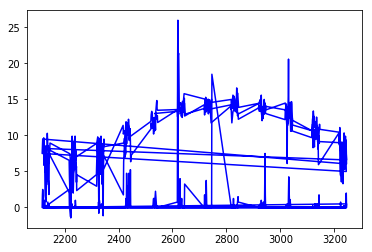

In [4]:
# 以南投縣為例[0:661]
# t = item_num_loc_day_temp.head(661)['year']+item_num_loc_day_temp.head(661)['month'] # 順序
t = item_num_loc_day_temp.head(661)['year']+item_num_loc_day_temp.head(661)['month']
y_real  =  nj   # 天氣(雨及溫度)
plt.plot(t, y_real, 'b')
plt.show()

In [41]:
# hyperparameters
lr = 0.001                  # learning rate
training_iters = 100        # train step 上限
batch_size = 7            
n_inputs = 3                # data_feature
n_steps = 7                 # time steps
n_hidden_units = 128        # neurons in hidden layer
n_classes = 1774            # Item_ID num 

In [42]:
# create x y placeholder
x = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_classes])

 - Functions of weight and bias

In [52]:
weights = {
    # shape (3, 128)
    'in': tf.Variable(tf.random_normal([n_inputs, n_hidden_units])),
    # shape (128, 1774)
    'out': tf.Variable(tf.random_normal([n_hidden_units, n_classes]))
}
biases = {
    # shape (128, )
    'in': tf.Variable(tf.constant(0.1, shape=[n_hidden_units, ])),
    # shape (1774, )
    'out': tf.Variable(tf.constant(0.1, shape=[n_classes, ]))
}

NameError: name 'tf' is not defined

 - Encoder inputs and outputs

In [44]:
def RNN(X, weights, biases):
    # 原始的 X 是 3 维数据, 我们需要把它变成 2 维数据才能使用 weights 的矩阵乘法
    # X ==> (128 batches * 7 steps, 3 inputs)
    X = tf.reshape(X, [-1, n_inputs])

    # X_in = W*X + b
    X_in = tf.matmul(X, weights['in']) + biases['in']
    # X_in ==> (128 batches, 7 steps, 128 hidden) 换回3维
    X_in = tf.reshape(X_in, [-1, n_steps, n_hidden_units])

In [46]:
# 使用 basic LSTM Cell.
lstm_cell = tf.contrib.rnn.BasicLSTMCell(n_hidden_units, forget_bias=1.0, state_is_tuple=True)
init_state = lstm_cell.zero_state(batch_size, dtype=tf.float32) # 初始化全零 state

In [47]:
outputs, final_state = tf.nn.dynamic_rnn(lstm_cell, X_in, initial_state=init_state, time_major=False)

NameError: name 'X_in' is not defined

In [9]:
# outputs generate
w_out = _weight([n_hiddens, n_output])
b_out = _bias([n_output])
preds = [tf.add(tf.matmul(decoder_outputs[i], w_out), b_out, name='pred') for i in range(dec_len)]
preds, y

([<tf.Tensor 'pred:0' shape=(?, 1) dtype=float32>,
  <tf.Tensor 'pred_1:0' shape=(?, 1) dtype=float32>,
  <tf.Tensor 'pred_2:0' shape=(?, 1) dtype=float32>,
  <tf.Tensor 'pred_3:0' shape=(?, 1) dtype=float32>,
  <tf.Tensor 'pred_4:0' shape=(?, 1) dtype=float32>],
 [<tf.Tensor 'answer:0' shape=(?, 1) dtype=float32>,
  <tf.Tensor 'answer_1:0' shape=(?, 1) dtype=float32>,
  <tf.Tensor 'answer_2:0' shape=(?, 1) dtype=float32>,
  <tf.Tensor 'answer_3:0' shape=(?, 1) dtype=float32>,
  <tf.Tensor 'answer_4:0' shape=(?, 1) dtype=float32>])

 - Loss and optimizer

In [10]:
output_loss = 0
for _y, _Y in zip(preds, y):
    output_loss += tf.reduce_mean(tf.nn.l2_loss(_y - _Y))

l_r = 1e-3
update_step = tf.train.AdamOptimizer(l_r).minimize(output_loss)

 - Evaluation function (plotting)

In [21]:
def evaluate(sess):
    batch_x = [y_real[i].reshape([-1, 1]) for i in range(5)]
    batch_y = [y_real[i+5].reshape([-1, 1]) for i in range(5)]
    feed_dict = {x[j]:batch_x[j] for j in range(enc_len)}
    feed_dict.update({y[j]:batch_y[j] for j in range(enc_len)})
    y_pred1 = np.array(sess.run(preds, feed_dict=feed_dict))

    batch_x = y_pred1
    batch_y = [y_real[i+10].reshape([-1, 1]) for i in range(5)]
    feed_dict = {x[j]:batch_x[j] for j in range(enc_len)}
    feed_dict.update({y[j]:batch_y[j] for j in range(enc_len)})
    y_pred2 = np.array(sess.run(preds, feed_dict=feed_dict))

    y_pred = np.vstack([y_pred1, y_pred2]).reshape([-1])
    print(len([y_real[4]]+list(y_pred)),len(list(y_pred)))
    plt.plot(np.arange(21), y_real[0:21], 'b')
    plt.plot(np.arange(21), [y_real[4]]+list(y_pred), '--r')    
    plt.legend(['Real', 'Prediction'])
    
def evaluate2(sess):
    batch_x = [y_real[i+3].reshape([-1, 1]) for i in range(5)]
    batch_y = [y_real[i+5+3].reshape([-1, 1]) for i in range(5)]
    feed_dict = {x[j]:batch_x[j] for j in range(enc_len)}
    feed_dict.update({y[j]:batch_y[j] for j in range(enc_len)})
    y_pred1 = np.array(sess.run(preds, feed_dict=feed_dict))

    batch_x = y_pred1
    batch_y = [y_real[i+10+3].reshape([-1, 1]) for i in range(5)]
    feed_dict = {x[j]:batch_x[j] for j in range(enc_len)}
    feed_dict.update({y[j]:batch_y[j] for j in range(enc_len)})
    y_pred2 = np.array(sess.run(preds, feed_dict=feed_dict))

    y_pred = np.vstack([y_pred1, y_pred2]).reshape([-1])
    plt.plot(np.arange(15), y_real[0+3:15+3], 'b')
    plt.plot(np.arange(11)+4, [y_real[4+3]]+list(y_pred), '--r')
    plt.legend(['Real', 'Prediction']) 
    
def evaluate3(sess):
    batch_x = [y_real[i+5].reshape([-1, 1]) for i in range(5)]
    batch_y = [y_real[i+5+5].reshape([-1, 1]) for i in range(5)]
    feed_dict = {x[j]:batch_x[j] for j in range(enc_len)}
    feed_dict.update({y[j]:batch_y[j] for j in range(enc_len)})
    y_pred1 = np.array(sess.run(preds, feed_dict=feed_dict))

    batch_x = y_pred1
    batch_y = [y_real[i+10+5].reshape([-1, 1]) for i in range(5)]
    feed_dict = {x[j]:batch_x[j] for j in range(enc_len)}
    feed_dict.update({y[j]:batch_y[j] for j in range(enc_len)})
    y_pred2 = np.array(sess.run(preds, feed_dict=feed_dict))

    y_pred = np.vstack([y_pred1, y_pred2]).reshape([-1])
    plt.plot(np.arange(15), y_real[0+5:15+5], 'b')
    plt.plot(np.arange(11)+4, [y_real[4+5]]+list(y_pred), '--r')
    plt.legend(['Real', 'Prediction'])

 - Training

In [22]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
epoch = 100
batch_size = n
loss_list = list()

ValueError: x and y must have same first dimension, but have shapes (11,) and (21,)

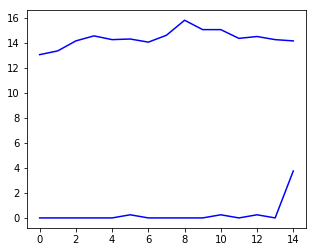

In [13]:
# Initial prediction
plt.figure(figsize=[17, 4])
plt.subplot(131)
evaluate(sess)
plt.subplot(132)
evaluate2(sess)
plt.subplot(133)
evaluate3(sess)
plt.show()

21 20


ValueError: setting an array element with a sequence.

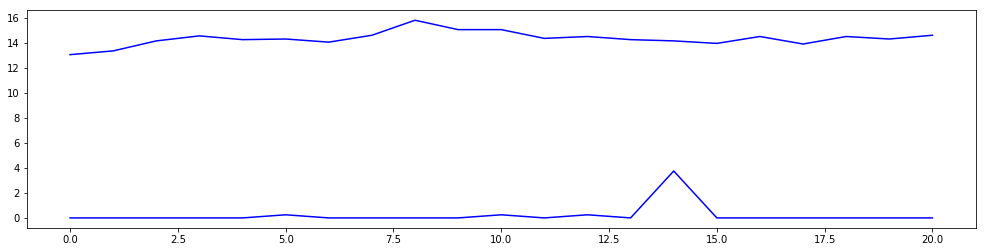

In [23]:
plt.figure(figsize=[17, 4])

evaluate(sess)